# Ejercicio 1

Clustering K-Means, Jerárquico y por densidad

A partir del dataset iris realizar análisis exploratorio y clasificación.
Considerar las siguientes actividades:

- Como preparar (escalar) datos para un proceso de agrupamiento. (MinMaxScaler)
- Cuales son los hiper-parámetros mas importantes en clustering,
- Como entrenar un algoritmo de clustering con la librería Scikit Learn,
- Como graficar los clusters encontrados por el algoritmo,
- Como calcular métricas de evaluación del modelo.

Comparar los resultados y explicar las diferencias.

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.datasets import load_iris
from sklearn.preprocessing import scale, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, MeanShift, estimate_bandwidth
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform

import warnings
warnings.filterwarnings("ignore")

In [36]:
# TODO cargo el dataset iris
iris = load_iris().data
iris

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [37]:
# TODO scale 
data_scale = scale(iris)

# Muestro las primeras 5 filas escaladas con scale
print("Escalado con scale:")
print(data_scale[1:6,])

# TODO MinMaxScaler
normalizer = MinMaxScaler()
data_minmax = normalizer.fit_transform(iris) 

# Muestro las primeras 5 filas escaladas con Min-Max
print("\nEscalado con Min-Max:")
print(data_minmax[1:6,])

Escalado con scale:
[[-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]
 [-0.53717756  1.93979142 -1.16971425 -1.05217993]]

Escalado con Min-Max:
[[0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]
 [0.30555556 0.79166667 0.11864407 0.125     ]]


## K-Means

In [38]:
# TODO Implementar algoritmo
k_means = KMeans(n_clusters=3) 

In [39]:
k_means.fit(data_scale) #TODO
y_km = k_means.predict(data_scale) #TODO

In [40]:
display(y_km)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

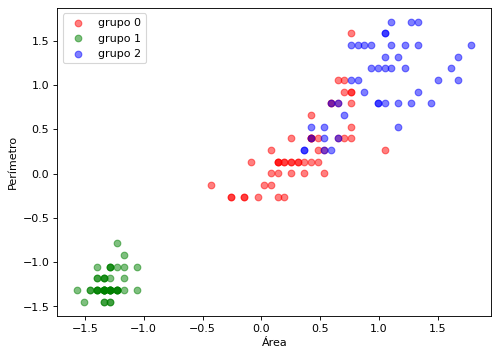

In [41]:
import matplotlib.pyplot as plt
names = ['grupo 0', 'grupo 1', 'grupo 2']
marcas = ['*', 'o', 's']
color = ['red', 'green', 'blue']
plt.figure(figsize=(7, 5), dpi=80)
for i in range(len(names)):
    cl = i
    plt.scatter(data_scale[y_km==cl,2], data_scale[y_km==cl,3], c=color[i], alpha=0.5, marker='o', label=names[i])
plt.xlabel("Área")
plt.ylabel("Perímetro")
plt.legend(loc='upper left')
plt.show()

## Clustering Jerárquico

In [42]:
# TODO 

H = linkage(data_scale, 
            method='average', 
            metric='euclidean')

In [43]:
squareform(pdist(data_scale[0:4,]))

array([[0.        , 1.17621868, 0.84560741, 1.10368502],
       [1.17621868, 0.        , 0.52337301, 0.43399991],
       [0.84560741, 0.52337301, 0.        , 0.28389113],
       [1.10368502, 0.43399991, 0.28389113, 0.        ]])

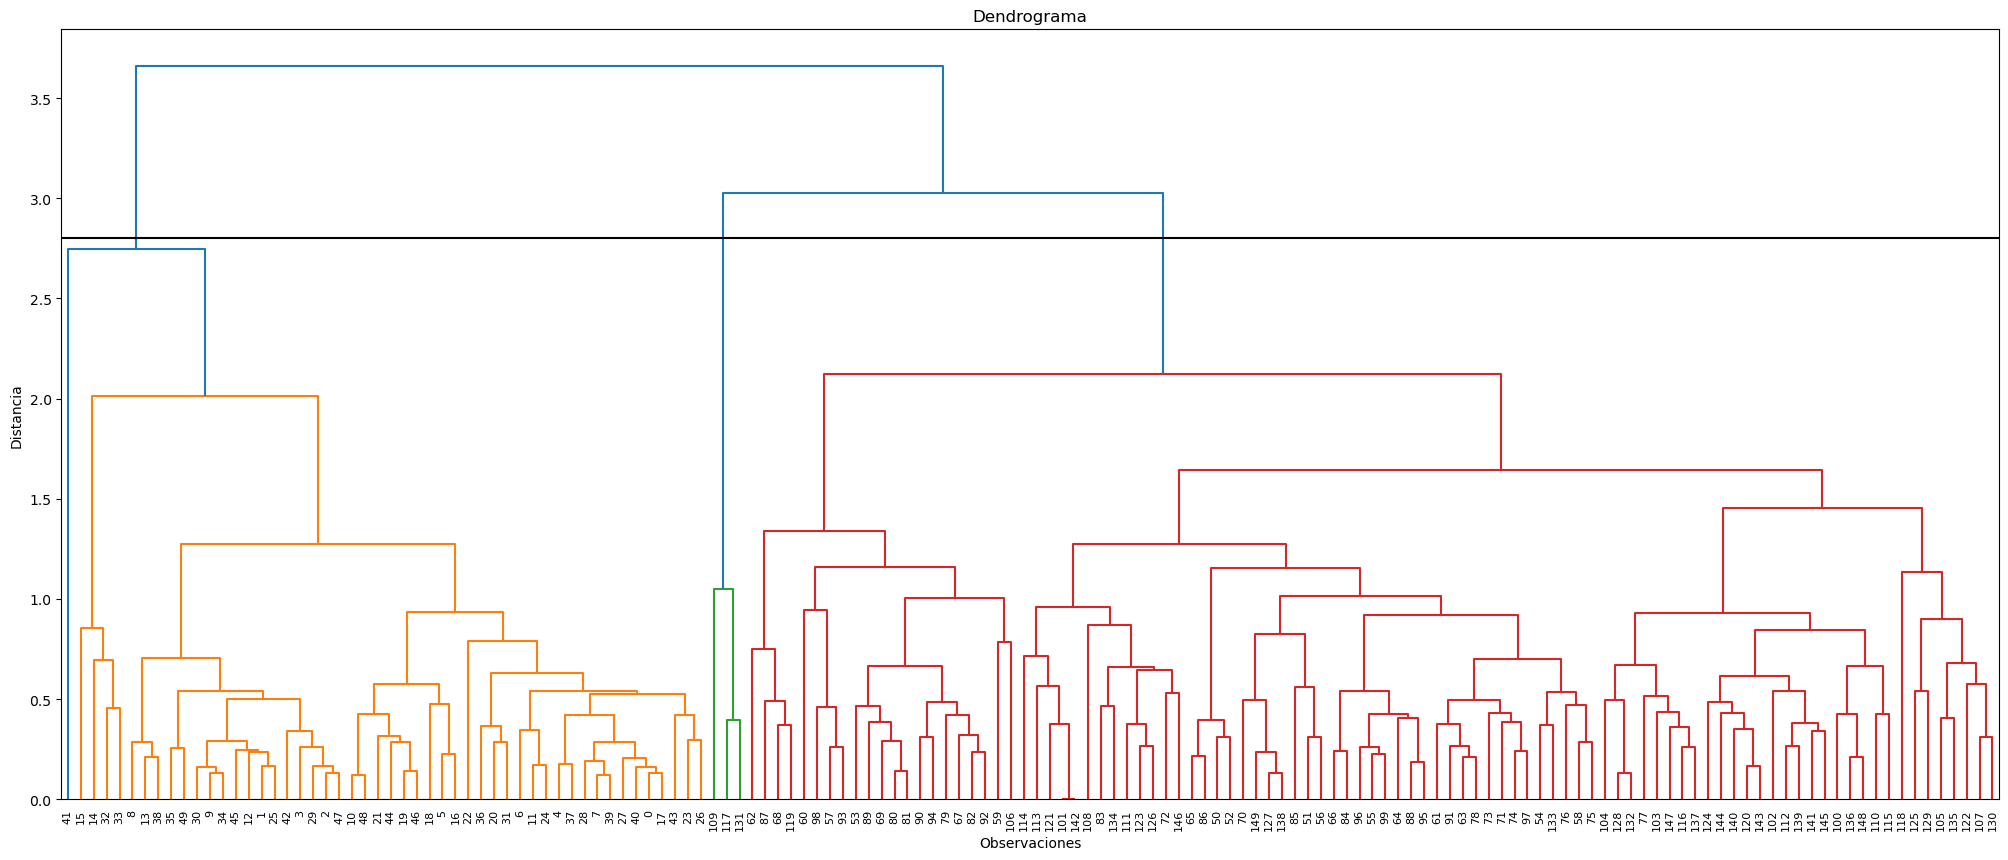

In [44]:
# Plot Dendongrama
max_d = 2.8
plt.figure(figsize=(25, 10))
plt.title('Dendrograma')
plt.xlabel('Observaciones')
plt.ylabel('Distancia')
dendrogram(
    H, 
    truncate_mode='lastp',
    p=150, 
    leaf_rotation=90.,
    leaf_font_size=8.,
)
plt.axhline(y=max_d, c='k')
plt.show()

In [58]:
ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')   # TODO AgglomerativeClustering
y_ag = ac.fit(data_scale) # TODO 
labels = y_ag.labels_ # TODO 

In [59]:
def graficar_mis_clusters(X_scaled, labels):
    names = ['grupo 0', 'grupo 1', 'grupo 2']
    marcas = ['*', 'o', 's']
    color = ['red', 'green', 'blue']
    plt.figure(figsize=(7, 5), dpi=80)
    for i in range(len(names)):
        cl = i
        plt.scatter(X_scaled[labels==cl,2], X_scaled[labels==cl,3], c=color[i], alpha=0.5, marker='o', label=names[i])
    plt.xlabel("Área")
    plt.ylabel("Perímetro")
    plt.legend(loc='upper left')
    plt.show()

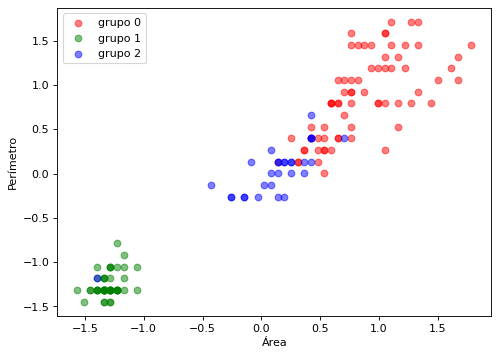

In [60]:
graficar_mis_clusters(data_scale,labels)

## DBSCAN

In [63]:
db = DBSCAN() # TODO
db.fit(data_scale)
y_db = db.labels_ # TODO 

np.unique(y_db)

array([-1,  0,  1], dtype=int64)

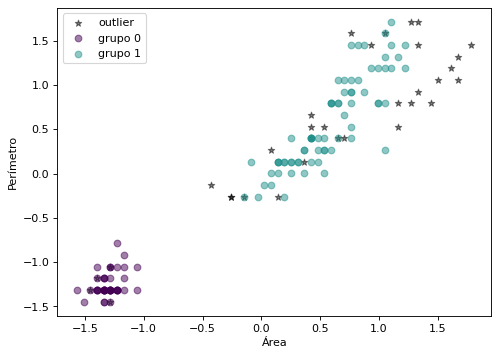

In [65]:
viridis = cm.get_cmap('viridis', len(np.unique(y_db)))
plt.figure(figsize=(7, 5), dpi=80)
for i in np.unique(y_db):
    cl = i
    etiqueta="grupo " + str(i)
    if cl==-1:
        plt.scatter(data_scale[y_db==cl,2], data_scale[y_db==cl,3], c="k", alpha=0.5, marker='*', label="outlier")
    else:
        plt.scatter(data_scale[y_db==cl,2], data_scale[y_db==cl,3], color=viridis(i), alpha=0.5, marker='o', label=etiqueta)
plt.xlabel("Área")
plt.ylabel("Perímetro")
plt.legend(loc='upper left')
plt.show()

## Meanshift

In [82]:
bandwidth = estimate_bandwidth(data_scale, quantile=.5, n_samples=3000) #TODO 
ms =MeanShift(bandwidth=bandwidth, bin_seeding=True) #TODO
ms.fit(data_scale) #TODO

MeanShift(bandwidth=2.40921801474058, bin_seeding=True)

In [83]:
labels= ms.labels_ #TODO 
#cluster_int8=np.uint8(ms.cluster_centers_)
#result=np.zeros(X.shape,dtype=np.uint8)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

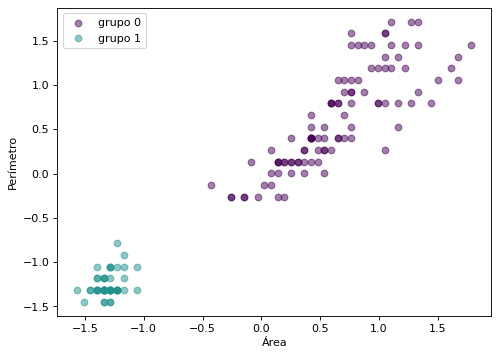

In [84]:
viridis = cm.get_cmap('viridis', len(np.unique(y_db)))
plt.figure(figsize=(7, 5), dpi=80)
for i in np.unique(labels):
    cl = i
    etiqueta="grupo " + str(i)
    if cl==-1:
        plt.scatter(data_scale[labels==cl,2], data_scale[labels==cl,3], c="k", alpha=0.5, marker='*', label="outlier")
    else:
        plt.scatter(data_scale[labels==cl,2], data_scale[labels==cl,3], color=viridis(i), alpha=0.5, marker='o', label=etiqueta)
plt.xlabel("Área")
plt.ylabel("Perímetro")
plt.legend(loc='upper left')
plt.show()